In [ ]:
import tensorflow as tf

print(tf.__version__)

2.14.0


In [ ]:
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()



4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
training_images=training_images / 255.0
test_images=test_images / 255.0

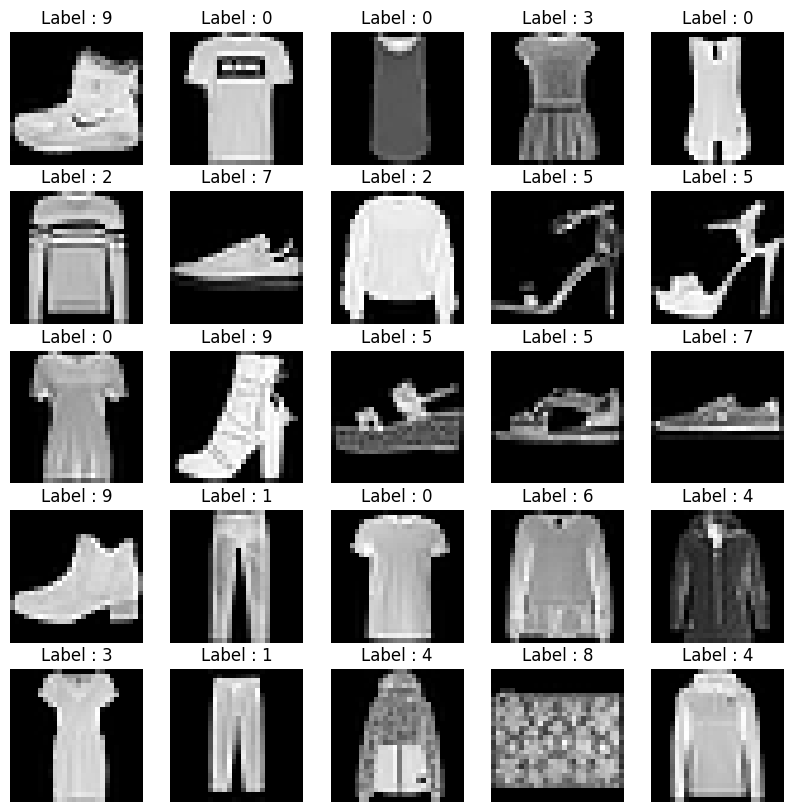

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(training_images[i], cmap='gray')
    plt.title(f"Label : {training_labels[i]}")
    plt.axis('off')
plt.show()

In [ ]:
print(f"Nombre d'images d'entraînement : {len(training_images)}")
print(f"Nombre d'images de test : {len(test_images)}")
print(f"Taille d'une image : {training_images[0].shape}")
print(f"Labels d'entraînement uniques : {set(training_labels)}")

Nombre d'images d'entraînement : 60000
Nombre d'images de test : 10000
Taille d'une image : (28, 28)
Labels d'entraînement uniques : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [ ]:


model = tf.keras.models.Sequential([ #les réseaux l'un après l'autre
  tf.keras.layers.Flatten(), #applati la donnée image
  tf.keras.layers.Dense(128, activation=tf.nn.relu),  #dense appel un réseau de neurone qui 128 neurone.
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)


Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4948 - accuracy: 0.8252
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3739 - accuracy: 0.8655
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3340 - accuracy: 0.8785
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3114 - accuracy: 0.8866
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3498 - accuracy: 0.8765


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Votre précision est probablement d'environ **89 % sur l"entraînement** et de **87 % sur la validation**
Ce n'est pas trop mauvais... **Mais comment l'améliorer encore plus ?**

Une façon efficace est d'utiliser les Convolutions.

Exécutez le code ci-dessous - il s'agit du même réseau de neurones que précédemment, mais cette fois avec des couches convolutives ajoutées en premier. Cela prendra plus de temps, mais regardez l'impact sur la précision :

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

2.9.2
4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
training_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

In [ ]:
training_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:

model_200 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),  #64 filtre de taille 3,3.     #si image clr (28,28,3)
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])


model_200.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model_200.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
history_200 = model_200.fit(training_images, training_labels,
                            epochs=5,
                            validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0775 - accuracy: 0.9747 - val_loss: 1.0784 - val_accuracy: 0.8883
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0674 - accuracy: 0.9774 - val_loss: 1.2179 - val_accuracy: 0.8861
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0785 - accuracy: 0.9758 - val_loss: 1.0872 - val_accuracy: 0.8904
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0699 - accuracy: 0.9769 - val_loss: 1.0996 - val_accuracy: 0.8912
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0715 - accuracy: 0.9772 - val_loss: 1.0598 - val_accuracy: 0.8911


In [ ]:
model_220 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(1, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2)
  ])


model_220.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model_220.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 1)         10        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 1)        0         
 )                                                               
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test_loss_200 = model_200.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.0598 - accuracy: 0.8911


Le modèle est probablement passé à environ 96 % sur les données de formation et 90 %  sur les données de validation.

C'est significatif, et un pas dans la bonne direction !

Essayez de l'exécuter pendant plus d'époques - disons environ 20, et explorez les résultats ! Mais alors que les résultats peuvent sembler vraiment bons, les résultats de validation peuvent en fait baisser, en raison de quelque chose appelé "surajustement/overfitiing".

(En un mot, le "overfitting" se produit lorsque le réseau apprend très bien les données de l'ensemble d'apprentissage, mais il est trop spécialisé pour ne se limiter qu'à ces données et, par conséquent, il est moins efficace pour voir *d'autres* données. Par exemple, si tous votre vie, vous n'avez vu que des chaussures rouges, alors quand vous voyez une chaussure rouge, vous seriez très doué pour l'identifier, mais les chaussures en daim bleu pourraient vous confondre... et vous savez que vous ne devriez jamais jouer avec mes chaussures en daim bleu.)

Ensuite, regardez à nouveau le code et voyez, étape par étape, comment les convolutions ont été construites :

L'étape 1 consiste à rassembler les données. Vous remarquerez qu'il y a un peu de changement ici dans la mesure où les données d'entraînement devaient être remodelées. C'est parce que la première convolution attend un seul tenseur contenant tout, donc au lieu de 60 000 éléments 28x28x1 dans une liste, nous avons une seule liste 4D de 60 000x28x28x1, et la même chose pour les images de test. Si vous ne le faites pas, vous obtiendrez une erreur lors de l'entraînement car les convolutions ne reconnaissent pas la forme.


```
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
```


Ensuite, définissez votre modèle. Maintenant, au lieu de la couche d'entrée en haut, vous allez ajouter une convolution. Les paramètres sont :

1. Le nombre de convolutions que vous souhaitez générer. Purement arbitraire, mais bon pour commencer avec quelque chose de l'ordre de 32
2. La taille de la convolution, dans ce cas une grille 3x3
3. La fonction d'activation à utiliser - dans ce cas, nous utiliserons relu, dont vous vous souviendrez peut-être qu'elle revient à renvoyer x lorsque x> 0, sinon à renvoyer 0
4. Dans la première couche, la forme des données d'entrée.

Vous suivrez la convolution avec une couche MaxPooling qui est ensuite conçue pour compresser l'image, tout en conservant le contenu des fonctionnalités qui ont été mises en évidence par la convlution. En spécifiant (2,2) pour le MaxPooling, l'effet est de diviser par quatre la taille de l'image. Sans entrer dans trop de détails ici, l'idée est qu'il crée un tableau 2x2 de pixels et sélectionne le plus grand, transformant ainsi 4 pixels en 1. Il répète cela sur l'image et, ce faisant, réduit de moitié le nombre de pixels horizontaux, et divise par deux le nombre de pixels verticaux, réduisant ainsi l'image de 25 %.

Vous pouvez appeler model.summary() pour voir la taille et la forme du réseau, et vous remarquerez qu'après chaque couche MaxPooling, la taille de l'image est réduite de cette façon.


```
modèle = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
```

Ajouter une autre convolution



```
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2)
```


Maintenant, aplatissez la sortie. Après cela, vous aurez juste la même structure DNN que la version non convolutive
```
  tf.keras.layers.Flatten(),
```


Les mêmes 128 couches denses et 10 couches de sortie que dans l'exemple de pré-convolution :


```
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
```


Compilez maintenant le modèle, appelez la méthode d'ajustement pour effectuer la formation et évaluez la perte et la précision à partir de l'ensemble de test.


```
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)
```


# Visualiser les convolutions et la mise en commun

Ce code nous montrera graphiquement les convolutions. L'impression (test_labels[:100]) nous montre les 100 premières étiquettes du jeu de test, et vous pouvez voir que celles à l'index 0, l'index 23 et l'index 28 ont toutes la même valeur (9). Ce sont toutes des chaussures. Jetons un coup d'œil au résultat de l'exécution de la convolution sur chacun d'eux et vous commencerez à voir émerger des caractéristiques communes entre eux. Maintenant, lorsque le DNN s'entraîne sur ces données, il travaille avec beaucoup moins, et il trouve peut-être un point commun entre les chaussures en fonction de cette combinaison convolution/mise en commun.

In [ ]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


In [ ]:
#mon premier modèl CNN une seule couche appelé model_cnn_1

In [ ]:
model_cnn_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax')
  ])


model_cnn_1.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model_cnn_1.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 5408)              0         
                                                                 
 dense_16 (Dense)            (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_cnn1= model_cnn_1.fit(training_images, training_labels,epochs=20,
                              validation_data=(test_images, test_labels))


Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4544 - accuracy: 0.8406 - val_loss: 0.3612 - val_accuracy: 0.8711
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3152 - accuracy: 0.8894 - val_loss: 0.3157 - val_accuracy: 0.8873
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2805 - accuracy: 0.9010 - val_loss: 0.2942 - val_accuracy: 0.8950
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2571 - accuracy: 0.9089 - val_loss: 0.2888 - val_accuracy: 0.8945
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2403 - accuracy: 0.9144 - val_loss: 0.2803 - val_accuracy: 0.8996
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2256 - accuracy: 0.9186 - val_loss: 0.2714 - val_accuracy: 0.9006
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2124 - accuracy: 0.9240 - val_loss: 0.2798 - val_accuracy:

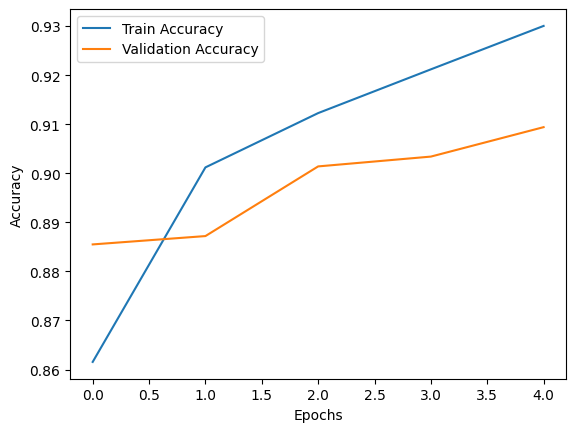

In [ ]:
plt.plot(history_cnn1.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()